# KARTIK KHANDELWAL
## LET'S GROW MORE (VIP)
> ### - Data Science Internship
### ADVANCED LEVEL TASK - 3

### *HANDWRITTEN EQUATION SOLVER USING CNN -> Part - 1*
> *Dataset - [Handwritten Math Symbols](https://www.kaggle.com/sagyamthapa/handwritten-math-symbols)*

![](https://images.prismic.io/texthelp-website-proof/75743780-be41-4d83-bd73-728b0add137e_EquatIO+Hero+Product+Screen.png?auto=compress,format)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-darkgrid')
import os
import tensorflow as tf
from tensorflow import keras
from keras.applications.mobilenet_v2 import MobileNetV2
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator

In [2]:
sdir = '../input/handwritten-math-symbols/dataset'
classlist=os.listdir(sdir)
filepaths=[]
labels=[]
classes=[]
for c in classlist:    
    classpath=os.path.join(sdir,c)
    if os.path.isdir(classpath): 
        classes.append(c)
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            if os.path.isfile(fpath):
                filepaths.append(fpath)
                labels.append(c)

In [3]:
fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series (labels, name='labels')
df=pd.concat([fseries, Lseries], axis=1)

In [4]:
train_gen = ImageDataGenerator(rescale=1./255)

training_data = train_gen.flow_from_dataframe(df, x_col= 'filepaths', y_col='labels',
                                             target_size=(128,128),
                                             batch_size=64,
                                             color_mode = "grayscale",
                                             class_mode = "categorical")

Found 9008 validated image filenames belonging to 16 classes.


In [5]:
from keras.layers import Input, Conv2D
input_shape = Input(shape=(128,128,1))
conv = Conv2D(3, kernel_size=(3,3), padding='same')(input_shape)
mobilenet = MobileNetV2(weights='imagenet', include_top=False, pooling='max')(conv)
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(mobilenet)
x=keras.layers.Dense(128, activation='relu')(x)
x=keras.layers.Dropout(rate=.3)(x)
output=keras.layers.Dense(len(classes), activation='softmax')(x)

model=keras.models.Model(inputs=input_shape, outputs=output)

model.compile(keras.optimizers.Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(training_data,  epochs=10)

2021-10-21 11:57:46.141392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-21 11:57:46.233066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-21 11:57:46.233869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-21 11:57:46.235191: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 0s 0us/step


2021-10-21 11:57:50.971402: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-10-21 11:57:56.339886: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


141/141 [==============================] - 53s 298ms/step - loss: 0.3062 - accuracy: 0.9063
Epoch 2/10
141/141 [==============================] - 16s 113ms/step - loss: 0.0303 - accuracy: 0.9907
Epoch 3/10
141/141 [==============================] - 16s 111ms/step - loss: 0.0181 - accuracy: 0.9953
Epoch 4/10
141/141 [==============================] - 17s 119ms/step - loss: 0.0127 - accuracy: 0.9960
Epoch 5/10
141/141 [==============================] - 16s 113ms/step - loss: 0.0076 - accuracy: 0.9978
Epoch 6/10
141/141 [==============================] - 16s 113ms/step - loss: 0.0137 - accuracy: 0.9966
Epoch 7/10
141/141 [==============================] - 16s 116ms/step - loss: 0.0160 - accuracy: 0.9950
Epoch 8/10
141/141 [==============================] - 16s 113ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 9/10
141/141 [==============================] - 17s 117ms/step - loss: 0.0130 - accuracy: 0.9958
Epoch 10/10
141/141 [==============================] - 16s 113ms/step - loss: 0.0151

In [6]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [7]:
reverse_mapping={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
                 10: 'add', 11: 'dec', 12: 'div', 13: 'eq', 14: 'mul', 15: 'sub'}

def mapper(value):
    return reverse_mapping[value]

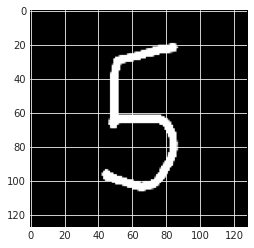

In [8]:
from keras.preprocessing import image
test = '../input/handwritten-math-symbols/dataset/5/0mKkrJd4.png'
test_image = image.load_img(test, target_size = (128,128),color_mode = "grayscale")
plt.imshow(test_image)

In [9]:
test_img = np.expand_dims(test_image,axis = 0)
test_img = test_img.reshape(1,128,128,1)
result = model.predict(test_img)
value=np.argmax(result)
move_name=mapper(value)
print(f"Prediction is {move_name}.")

Prediction is 5.


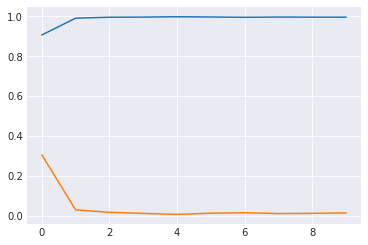

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()